In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
file_path = 'C:/Users/Jacob/Documents/datasets/amsterdamumcdb-1.0.2/'
save_path = 'C:/Users/Jacob/Documents/datasets/amsterdamumcdb-1.0.2-processed/'
if not os.path.exists(save_path):
    os.mkdir(save_path)

In [4]:
adm = pd.read_csv(os.path.join(save_path, 'admissions.csv'))
adm.head()

,Unnamed: 0,patientid,admissionid,admissioncount,location,urgency,origin,admittedat,admissionyeargroup,dischargedat,...,destination,gender,agegroup,dateofdeath,weightgroup,weightsource,heightgroup,heightsource,specialty,icudeath
0,4,4,4,1,IC&MC,0,Verpleegafdeling zelfde ziekenhuis,0,2010-2016,180900000,...,19,Man,70-79,NaN,70-79,Anamnestisch,170-179,Anamnestisch,Cardiochirurgie,False
1,5,5,5,1,IC,1,Eerste Hulp afdeling zelfde ziekenhuis,0,2010-2016,246420000,...,31,Man,50-59,NaN,60-69,Geschat,160-169,Gemeten,Longziekte,False
2,9,9,9,1,IC,0,NaN,0,2003-2009,242040000,...,15,Vrouw,70-79,NaN,70-79,NaN,159-,NaN,Cardiochirurgie,False
3,12,12,12,1,IC,0,NaN,0,2003-2009,627960000,...,29,Man,18-39,NaN,90-99,NaN,NaN,NaN,NaN,False
4,15,14,15,1,IC,1,Eerste Hulp afdeling zelfde ziekenhuis,0,2010-2016,893220000,...,Overleden,Man,60-69,812280000.0,60-69,Geschat,160-169,Geschat,Cardiologie,True


## Procedure order items data

In [5]:
poi = pd.read_csv(os.path.join(file_path, "procedureorderitems.csv"), encoding='latin-1')
print(poi.shape)
poi = poi.loc[poi["admissionid"].isin(adm["admissionid"])]
print(poi.shape)
poi.head()

(2188626, 8)
(810995, 8)


,admissionid,orderid,ordercategoryid,ordercategoryname,itemid,item,registeredat,registeredby
75,4,7384251,73,Opdr. Laboratorium afname,9207,X-Lab nader te bepalen,132900000,ICV_MC-Verpleegkundig
76,4,7380960,73,Opdr. Laboratorium afname,9267,Lab. CCH-VAT T = 2,14400000,ICV_IC-Verpleegkundig
77,4,7381264,73,Opdr. Laboratorium afname,9268,Lab. CCH-VAT T = 6,28620000,ICV_IC-Verpleegkundig
78,4,7380698,73,Opdr. Laboratorium afname,9269,Lab. CCH-VAT T = 0,7080000,ICV_IC-Verpleegkundig
79,4,7380697,73,Opdr. Laboratorium afname,9270,Bloedgas afnemen,7080000,ICV_IC-Verpleegkundig


In [6]:
poi["admissionid"].nunique()

5239

In [7]:
# Top 30
poi = poi.loc[poi["item"].isin(poi["item"].value_counts().index.to_list()[:30])]
print(poi.shape)

(605659, 8)


(605642, 8)


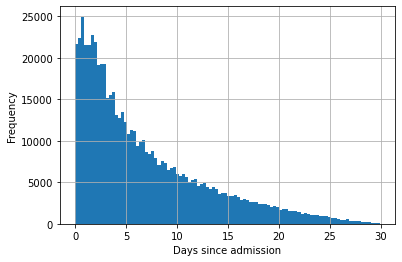

In [8]:
poi = poi.loc[0 < poi["registeredat"]]
poi["registeredat"] = poi["registeredat"] / 1000 / 3600 / 24
print(poi.shape)
_ = poi["registeredat"].hist(bins=100), plt.xlabel("Days since admission"), plt.ylabel("Frequency")

In [9]:
poi["item"].unique()

array(['X-Lab nader te bepalen', 'Lab. dgs Standaard 6.00u',
       'Glucose afnemen', 'ECG 6.00u', 'Pijnscore bepalen',
       'CAM-ICU score bepalen', 'X-Opdracht nader te bepalen',
       'Gantt-lijst controle',
       'Opnieuw profiel monitor en alarmen instellen', 'Decubitus score',
       'X-Thorax 6.00u', 'X-opdracht verzorging', 'Cuffdruk meten',
       'Wisselligging', 'Verpl. overzicht bijwerken',
       'Filter expiratie cassette verwisselen',
       'Spuitpomp en Infuus controle op datum en tijd',
       'Hielen vrijleggen', 'Opdr.\\Proc. Stoppen',
       'Opdr.\\Proc. wijzigen', 'PT/CT afnemen',
       'Cuffdruk meten 8.00 uur', 'Drukzak vernieuwen', 'Bloed afnemen',
       'Research generiek', 'Sondevoedingsysteem verschonen',
       'Venflon doorspuiten NaCL0,9%', 'Hielbogen', 'Neuro controles',
       'IABP pulsaties'], dtype=object)

In [10]:
poi.to_csv(os.path.join(save_path, "procedureorderitems.csv"))